<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) üêº</center></h1>

<center><strong>MDS7202: Laboratorio de Programaci√≥n Cient√≠fica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matias Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no ser√°n revisados

- Nombre de alumno 1: Javiera Palominos
- Nombre de alumno 2: Juan Carlos Araya


### **Link de repositorio de GitHub:** `https://github.com/kuanki1/MDS7202Labs/blob/main/Lab5/Laboratorio5.ipynb`


## Reglas:

- **Grupos de 2 personas**
- **Ausentes** deber√°n realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente ser√°n respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas pr√°cticas de programaci√≥n vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de im√°genes sin el uso de librer√≠as.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deber√° ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al m√°ximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante m√°s eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripci√≥n del laboratorio.

### Importamos librerias utiles üò∏

In [2]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

     --------------------------------------- 10.9/10.9 MB 54.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2


     ---------------------------------------- 96.5/96.5 kB 2.7 MB/s eta 0:00:00


     -------------------------------------- 242.1/242.1 kB 7.5 MB/s eta 0:00:00


<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentaci√≥n de Clientes en Tienda de Retail üõçÔ∏è

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el √°rea de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualizaci√≥n de los datos y se√±ale los atributos que componen el dataset. Se√±ale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price Customer ID         Country  
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom

Columnas Dataset:  ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country'] 

Tipos de Variables:  
 Invoice              category
StockCode            category
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID          category
Country                object
dtype: object 

Descripci√≥n de las columnas: 
- Invoice es el n√∫mero de la factura.
- StockCode es el c√≥digo del producto en el inventario.
- Description es la descripci√≥n del producto (su nombre y principales caracter√≠sticas).
- Quantity es la cantidad del producto que se est√° vendiendo en esa factura.
- InvoiceDate es la fecha y hora de la factura.
- Price es el precio unitario del producto.
- Customer ID es el identificador num√©rico del cliente.
- Country es el pa√≠s donde se realiz√≥ la venta.


<AxesSubplot:>

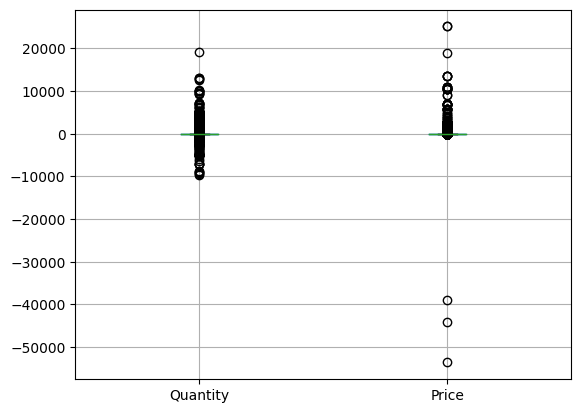

In [102]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
display(df_retail.head())

print("Columnas Dataset: ", list(df_retail.columns), "\n")
print("Tipos de Variables: ", "\n", df_retail.dtypes, "\n")
print("Descripci√≥n de las columnas: ")
print("- Invoice es el n√∫mero de la factura.")
print("- StockCode es el c√≥digo del producto en el inventario.")
print("- Description es la descripci√≥n del producto (su nombre y principales caracter√≠sticas).")
print("- Quantity es la cantidad del producto que se est√° vendiendo en esa factura.")
print("- InvoiceDate es la fecha y hora de la factura.")
print("- Price es el precio unitario del producto.")
print("- Customer ID es el identificador num√©rico del cliente.")
print("- Country es el pa√≠s donde se realiz√≥ la venta.")

display(df_retail.boxplot())


## 1.2 Analis√≠s Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualizaci√≥n del dataset, *Don Mora* le solicita que realicen un an√°lisis exploratorio de los datos, para esto les deber√°n realizar un an√°lisis univariado y multivariado. De la revisi√≥n, ustedes deben explicar potenciales anomal√≠as visualizadas y se√±alar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con an√°lisis univariable, multivariable y de datos faltantes. ¬øQu√© beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 l√≠neas para su respuesta.

**Respuesta a la Pregunta:**

> El an√°lisis univariable consiste en estudiar cada variable presente en el dataset de manera unitaria (por ejemplo estudio de la distribuci√≥n de una variable). Al contrario, an√°lisis multivariable se concentra en la relaci√≥n entre las variables presentes en el dataset (por ejemplo una matriz de correlaci√≥n entre las variables). Respecto a los datos faltantes es cuando en las filas existen datos nulos o nan. Gracias a estos an√°lisis podemos determinar si existen datos err√≥neos en el dataset, como por ejemplo se observ√≥ en la secci√≥n anterior que existen en este dataset precios y cantidades negativas en la facturas de venta, lo cual es inconsistente con la realidad, esto producir√≠a que posteriores an√°lisis no sean certeros y no se puedan obtener conclusiones √∫tiles.


### 1.2.1 An√°lisis Univariado [2 Puntos]

A continuaci√≥n, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la funci√≥n ``profile_serie()`` la cual recibe una serie y le entrega un an√°lisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un an√°lisis univariado de estas. A continuaci√≥n, comente acerca de el comportamiento de cada variable seg√∫n las estad√≠sticas descriptivas y los gr√°ficos generados.

In [26]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [27]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

> Respecto al precio podemos observar que el valor m√≠nimo es negativo, lo cual indicar√≠a que hay un error en ese dato. Adem√°s se observan precios iguales a cero, lo que tambi√©n puede ser un error o una forma de indicar un producto de regalo (esto no lo podemos determinar solo con la visualizaci√≥n presentada). Finalmente cabe indicar que el precio m√°ximo es considereablemente mayor a la media, lo cual se traduce en valores altos para la desviaci√≥n est√°ndar y skew, esto sumado a que el 75% de los datos est√°n bajo un valor significativamente menor al m√°ximo permite concluir que el gr√°fico sin outliers resulta m√°s representativo de la distribuci√≥n de los precios.

In [28]:
profile_serie(df_retail['Invoice'])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

> Se puede observar que para las 525461 filas del dataset, existen 28816 facturas. Finalmente se puede concluir que la mayor cantidad de productos presentes en una factura es 675 (factura 537434).

In [29]:
profile_serie(df_retail['StockCode']) 

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

> Se puede observar que existen 4632 productos √∫nicos en el dataset. Adem√°s se puede agregar que el producto 85123A es el m√°s presente en las facturas.

In [30]:
profile_serie(df_retail['Description']) 

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

Seg√∫n esta columna se observa que existen 4682 productos distintos, lo cual no calza con la informaci√≥n de la columna StockCode. Adem√°s se puede observar que el producto m√°s presente en las facturas es el WHITE HANGING HEART T-LIGHT HOLDER con 3549 instancias.

In [31]:
profile_serie(df_retail['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

> En esta columna se puede observar que existen valores negativos (2.35%), lo que carece de sentido. Finalemnte, al igual que en los gr√°ficos de los precios sacar los outliers representa una ventaja para identificar la distribuci√≥n de la variable, esto debido a un valor m√°ximo mucho mayor al promedio (y al 75% de los datos).

In [32]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

> Respecto a la columna InvoiceDate se puede observar que las ventas registradas en el dataset ocurren entre 2009-12-01 y 2010-12-09.

In [33]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

Respecto a la columna Customer ID se puede observar que existe alrededor de un 20% de missing values, esto indicar√≠a que no siempre se registra al cliente que realiza la compra. Adem√°s se puede afirmar que el cliente registrado que m√°s veces ha comprado es el cliente con el ID 14911.

In [34]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

> Se observa que las ventas registradas fueron realizadas en 40 pa√≠ses distintos, de estos el pa√≠s que m√°s instancias posee es United Kingdom, abarcando alrededor del 92% de las filas del dataset.

### 1.2.2 An√°lisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrar√° la funci√≥n ``profile_df()`` que recibe un dataframe como entrada y realiza un an√°lisis bivariado de todas las variables num√©ricas que conforman el dataframe, un analisis de la correlaci√≥n de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [35]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

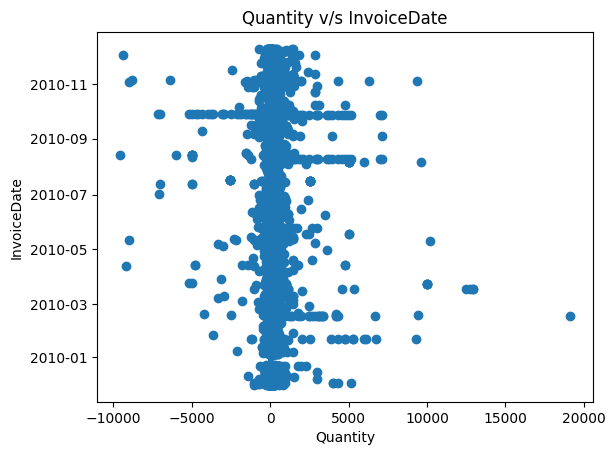

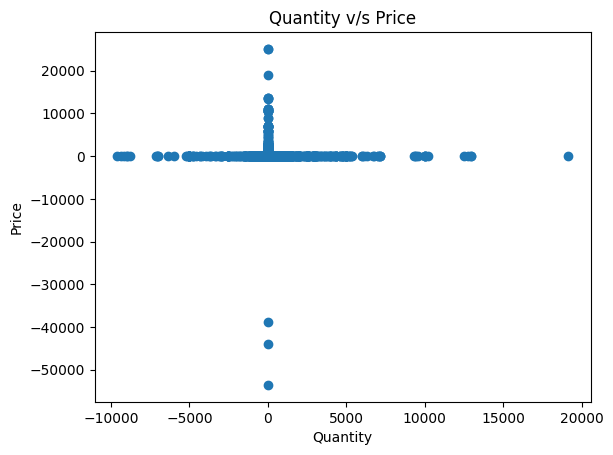

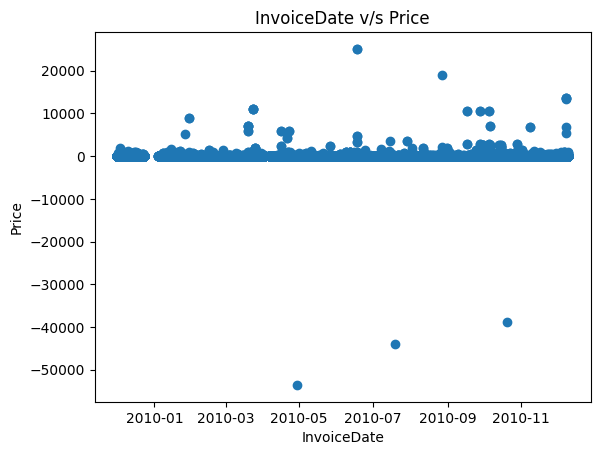

## Correlation:

C:\Users\Kuanki\AppData\Local\Temp\ipykernel_3292\1966549970.py:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

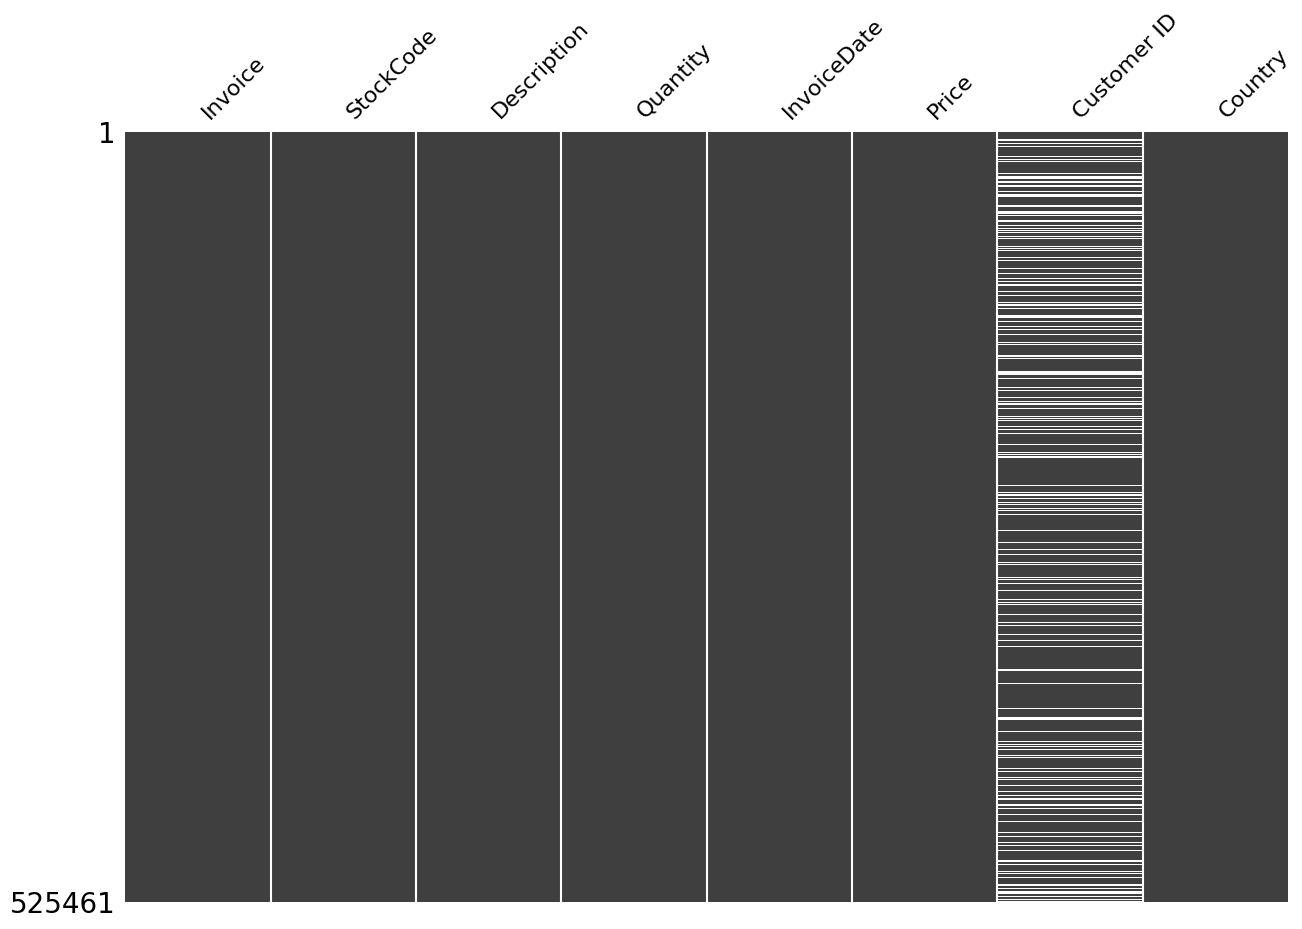

In [36]:
profile_df(df_retail)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una funci√≥n que permita limpiar el dataset. Realice esta funci√≥n en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la funci√≥n, realice nuevamente el an√°lisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [37]:
def clean(df):
    df=df[df['Price']>0]
    df=df[df['Quantity']>0]
    df= df.dropna()
    df=df.dropna().reset_index(drop=True)
    return df

In [38]:
df_retail2=clean(df_retail)

In [43]:
profile_serie(df_retail2["Price"])
profile_serie(df_retail2['Invoice'])
profile_serie(df_retail2['StockCode']) 
profile_serie(df_retail2['Description']) 
profile_serie(df_retail2['Quantity']) 
profile_serie(df_retail2['InvoiceDate'])
profile_serie(df_retail2['Customer ID'])
profile_serie(df_retail2['Country'])

## Price Profile

Type                            float64
Number of observations         407664.0
Mean                           3.294438
Std                           34.757965
Min                               0.001
25%                                1.25
50%                                1.95
75%                                3.75
Max                             10953.5
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       63865.331746
Skew                         235.066862
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407478
Duplicate rows (%)              99.95 %
Total size in memory      3261440 bytes
dtype: object

## Invoice Profile

Type                           category
Number of observations           407664
Unique                            19213
Top                              500356
Freq                                270
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   405936
Duplicate rows (%)              99.58 %
Total size in memory      2102792 bytes
dtype: object

## StockCode Profile

Type                          category
Number of observations          407664
Unique                            4017
Top                             85123A
Freq                              3153
                                      
Missing cells                        0
Missing cells (%)                0.0 %
Duplicate rows                  407506
Duplicate rows (%)             99.96 %
Total size in memory      984648 bytes
dtype: object

## Description Profile

Type                                                  object
Number of observations                                407664
Unique                                                  4444
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3153
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        407462
Duplicate rows (%)                                   99.95 %
Total size in memory                           3261440 bytes
dtype: object

## Quantity Profile

Type                              int64
Number of observations         407664.0
Mean                          13.585585
Std                           96.840747
Min                                 1.0
25%                                 2.0
50%                                 5.0
75%                                12.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        9572.064923
Skew                          79.917702
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407550
Duplicate rows (%)              99.97 %
Total size in memory      3261440 bytes
dtype: object

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           407664
Mean                      2010-07-01 10:15:11.871688192
Min                                 2009-12-01 07:45:00
25%                                 2010-03-26 14:01:00
50%                                 2010-07-09 15:47:00
75%                                 2010-10-14 17:09:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   406199
Duplicate rows (%)                              99.64 %
Total size in memory                      3261440 bytes
dtype: object

## Customer ID Profile

Type                          category
Number of observations        407664.0
Unique                          4312.0
Top                            14911.0
Freq                            5570.0
                                      
Missing cells                        0
Missing cells (%)                0.0 %
Duplicate rows                  407573
Duplicate rows (%)             99.98 %
Total size in memory      982656 bytes
dtype: object

## Country Profile

Type                              object
Number of observations            407664
Unique                                37
Top                       United Kingdom
Freq                              370929
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    407664
Duplicate rows (%)               100.0 %
Total size in memory       3261440 bytes
dtype: object

## Bivariant Analysis:

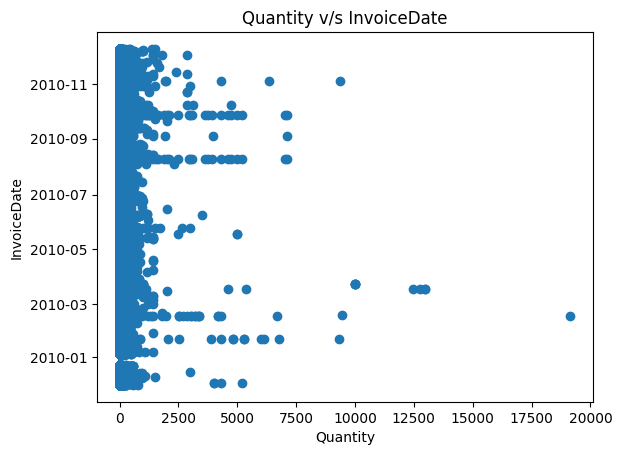

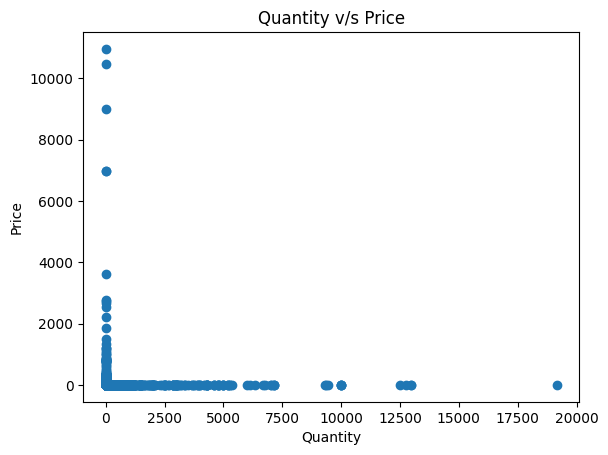

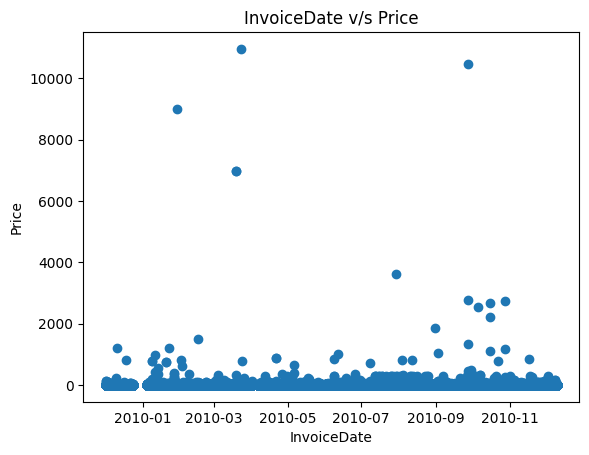

## Correlation:

C:\Users\Kuanki\AppData\Local\Temp\ipykernel_3292\1966549970.py:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

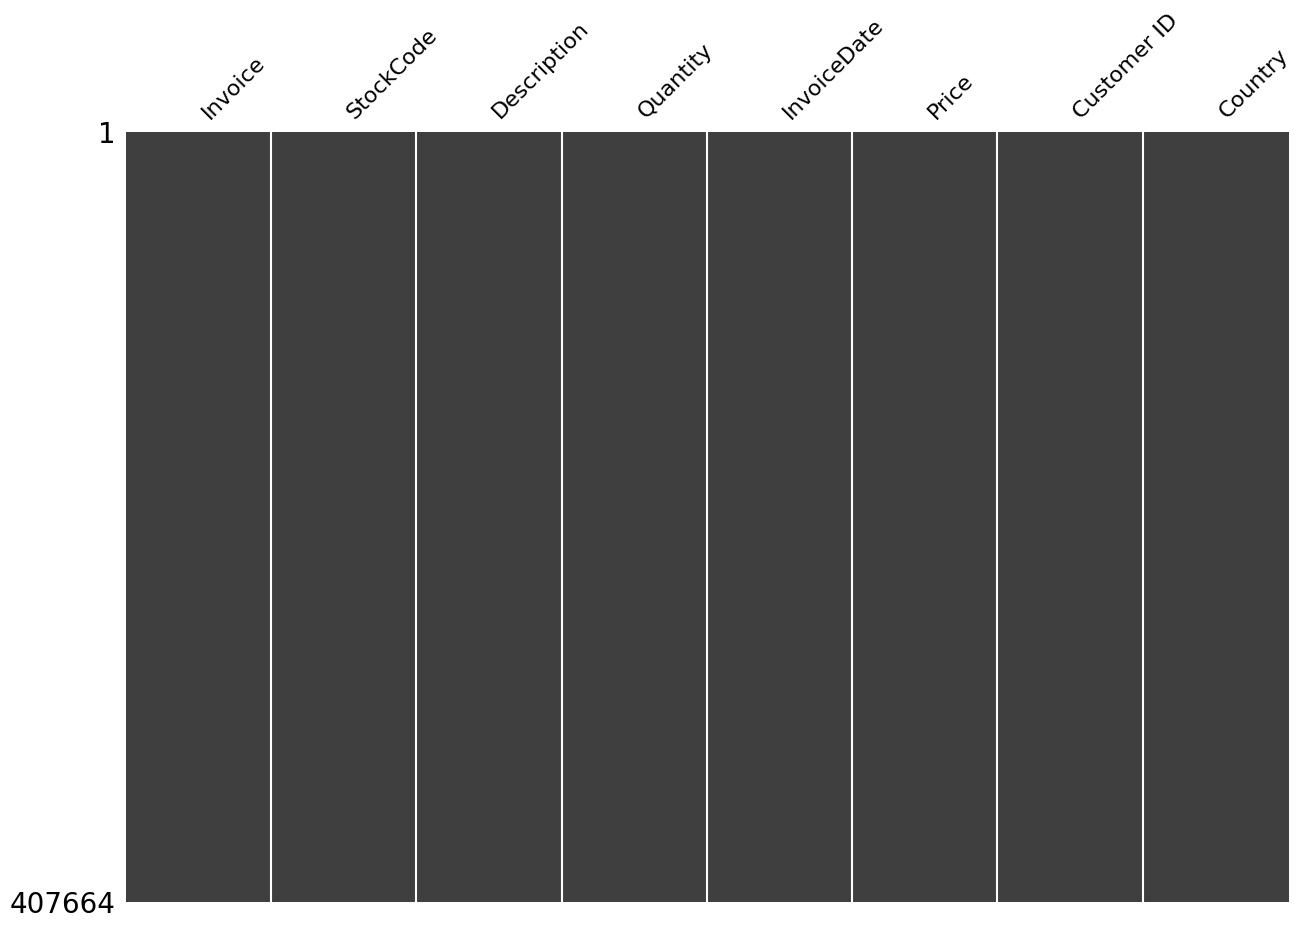

In [39]:
profile_df(df_retail2)

Las principales diferencias radican en que el dataframe limpio ya no posee precios y cantidades no positivas, y tampoco no se tienen valores nulos en customer ID.

### 1.2.4 Obtenci√≥n de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la secci√≥n 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan m√°s ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la informaci√≥n en un gr√°fico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¬øLos art√≠culos m√°s vendidos son los mismos que generan m√°s ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [70]:
df_retail2["Ganancia"] = df_retail2["Price"] * df_retail2["Quantity"]
df_retail3 = df_retail2.groupby(["Description"]).sum()
df_retail3.sort_values("Ganancia", ascending=False, inplace=True)
df_retail3.reset_index(inplace=True)
display(df_retail3.head(n=30))
df_retail5 = df_retail3.copy()
df_retail5.sort_values("Quantity", ascending=False, inplace=True)
df_retail5.reset_index(inplace=True)
display(df_retail5.head(n=30))

fig = px.bar(df_retail3.head(n=30), x='Description', y='Ganancia')
fig.show()

fig = px.bar(df_retail5.head(n=30), x='Description', y='Quantity')
fig.show()

C:\Users\Kuanki\AppData\Local\Temp\ipykernel_3292\995968387.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Description  Quantity     Price   Ganancia
0    WHITE HANGING HEART T-LIGHT HOLDER     56915   9003.99  151624.31
1              REGENCY CAKESTAND 3 TIER     12497  21207.65  143893.35
2                                Manual      2630  96583.54   98560.64
3         ASSORTED COLOUR BIRD ORNAMENT     44551   2288.81   70493.83
4               JUMBO BAG RED RETROSPOT     29578   2067.90   51759.30
5                               POSTAGE      2212  19964.83   48741.08
6   ROTATING SILVER ANGELS T-LIGHT HLDR     21591    656.71   40186.65
7       PAPER CHAIN KIT 50'S CHRISTMAS      13860   2413.60   36933.50
8                         PARTY BUNTING      8316   3313.10   35035.90
9             EDWARDIAN PARASOL NATURAL      7201   2847.40   34044.75
10                 JUMBO BAG STRAWBERRY     19291   1708.80   33957.45
11           VINTAGE UNION JACK BUNTING      4002   6423.22   33852.96
12              EDWARDIAN PARASOL BLACK      6709   3142.45   31457.55
13              CREAM HEART CARD HOLDER      9918   2711.63   29911.72
14       STRAWBERRY CERAMIC TRINKET BOX     25398   1734.81   29779.86
15       JUMBO  BAG BAROQUE BLACK WHITE     16654   1594.05   29493.30
16         VINTAGE UNION JACK MEMOBOARD      3903   3037.78   28756.49
17             HOME BUILDING BLOCK WORD      4814   7230.05   28206.80
18             BLACK RECORD COVER FRAME      8223    857.37   28144.89
19     SET/5 RED SPOTTY LID GLASS BOWLS     10250   2351.90   27814.30
20     RED HANGING HEART T-LIGHT HOLDER      9884   2987.09   27386.16
21                 LUNCH BAG RED SPOTTY     17314   1768.74   27041.30
22                        CHILLI LIGHTS      6085   2079.14   26573.63
23               JUMBO STORAGE BAG SUKI     14723   1892.60   26464.85
24             RED RETROSPOT CAKE STAND      2626   6536.48   26385.14
25    WOOD BLACK BOARD ANT WHITE FINISH      4972   2939.18   26035.08
26    JUMBO SHOPPER VINTAGE RED PAISLEY     14172   1820.10   25610.40
27       JUMBO BAG PINK VINTAGE PAISLEY     14542   1244.83   25453.90
28    COLOUR GLASS. STAR T-LIGHT HOLDER      8837   1414.50   24985.25
29      JUMBO BAG PINK WITH WHITE SPOTS     13777   1400.46   24472.05

index                          Description  Quantity    Price   Ganancia
0       0   WHITE HANGING HEART T-LIGHT HOLDER     56915  9003.99  151624.31
1     139    WORLD WAR 2 GLIDERS ASSTD DESIGNS     54754   107.48   11319.62
2     200                  BROCADE RING PURSE      48166    39.10    8847.66
3      41     PACK OF 72 RETRO SPOT CAKE CASES     45156   646.16   21853.08
4       3        ASSORTED COLOUR BIRD ORNAMENT     44551  2288.81   70493.83
5      65          60 TEATIME FAIRY CAKE CASES     35806   642.76   17503.20
6      86   PACK OF 60 PINK PAISLEY CAKE CASES     31006   519.17   15103.75
7       4              JUMBO BAG RED RETROSPOT     29578  2067.90   51759.30
8      56                 SMALL POPCORN HOLDER     25718   587.86   19530.96
9     744   BLACK AND WHITE PAISLEY FLOWER MUG     25685    18.81    3019.57
10     14       STRAWBERRY CERAMIC TRINKET BOX     25398  1734.81   29779.86
11    240             PACK OF 12 SUKI TISSUES      24704    83.27    7857.82
12    132          PACK OF 72 SKULL CAKE CASES     24618   378.57   11657.82
13     96  COLOUR GLASS T-LIGHT HOLDER HANGING     24032   385.60   14250.40
14    372       PACK OF 12 RED SPOTTY TISSUES      22643    65.90    5923.09
15    488         ASSTD DESIGN BUBBLE GUM RING     22470    81.02    4634.70
16    519      GIRLS ALPHABET IRON ON PATCHES      22177    10.09    4311.57
17    373     PACK OF 12 PINK PAISLEY TISSUES      21986    60.42    5918.10
18      6  ROTATING SILVER ANGELS T-LIGHT HLDR     21591   656.71   40186.65
19    160       72 SWEETHEART FAIRY CAKE CASES     21471   399.25   10200.32
20    407         PACK OF 12 WOODLAND TISSUES      20820    64.53    5416.50
21     89       HANGING JAM JAR T-LIGHT HOLDER     19303   432.38   15075.31
22     10                 JUMBO BAG STRAWBERRY     19291  1708.80   33957.45
23    119            ASSORTED COLOURS SILK FAN     19202   229.25   12784.88
24    194       PACK OF 60 DINOSAUR CAKE CASES     18971   344.79    9006.53
25    148              MINI PAINT SET VINTAGE      17545   199.20   11081.25
26     21                 LUNCH BAG RED SPOTTY     17314  1768.74   27041.30
27    109    HANGING HEART ZINC T-LIGHT HOLDER     17297   632.73   13282.43
28    400          SMALL CHINESE STYLE SCISSOR     17041    16.24    5503.22
29    682        BOYS ALPHABET IRON ON PATCHES     16993     7.40    3280.53

Gracias a los dataframes mostrados se puede determinar (sobre todo el segundo que muestra el ranking de ambos TOP) que no son necesariamente los mismos, aunque se repiten algunos, como por ejemplo dentro del TOP 10 de ganancias los lugares 1, 4 y 5 ocupan los puestos 1, 5 y 8 del TOP de cantidad vendida, otros dentro del TOP 10 no entran ni siquiera en el TOP 100 de ganancias.  

### 1.2.5 Visualizaci√≥n del registro temporal [0,75 ptos]

El due√±o del retail en su af√°n por saber m√°s sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el d√≠a tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `a√±o-mes-d√≠a`. ¬øEs posible observar datos extra√±os?, Comente lo que observa del gr√°fico.

In [98]:
def plot_ventas(dataframe):
    df_retail4 = dataframe.copy()
    df_retail4["InvoiceDate"] = pd.to_datetime(df_retail4["InvoiceDate"]).dt.date
    df_retail4 = df_retail4.groupby(["InvoiceDate"]).sum("Ganancia").reset_index()
    fig = px.line(df_retail4, x='InvoiceDate', y='Ganancia')
    fig.show()

In [103]:
plot_ventas(df_retail2)

Los datos observados son consistentes con la realidad, a pesar de que se observan peaks bastante elevados respecto a la media, esto no es extra√±o en el rubro de las ventas, ya que estas responden a fluctuaciones del mercado impredecibles (como por ejemplo una crisis monetaria o un estallido social) y a eventos conocidos (como por ejemplo festividades o √©pocas de siembra). 

# Conclusi√≥n
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los d√≠as de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>